# 1. 라이브러리 불러오기

In [2]:
!pip install statsmodels

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from datetime import datetime
from statsmodels.tsa.arima.model import ARIMA

In [4]:
# 경고 무시 코드
import warnings

# 경고 필터링
warnings.filterwarnings("ignore")

# 2. 데이터 불러오기

In [5]:
# 2022년 1~12월

for i in range(1, 13):
    globals()[f'group{i}'] = pd.read_excel(f'2022.{i}월_10개 관심집단수.xlsx')

In [6]:
# 2023년 1~3월

group13 = pd.read_excel('2023.1월_10개 관심집단수.xlsx')
group14 = pd.read_excel('2023.2월_10개 관심집단수.xlsx')
group15 = pd.read_excel('2023.3월_10개 관심집단수.xlsx')

In [7]:
# 날짜 컬럼 추가

for i in range(1, 13):
    globals()[f'group{i}']['month'] = f'2022-{i}'

In [8]:
group13['month'] = '2023-1'
group14['month'] = '2023-2'
group15['month'] = '2023-3'

In [9]:
# 15개월치 합치기

group_list = [group1, group2, group3, group4, group5, group6, group7, group8, group9, group10, group11, group12, group13, group14, group15]

group = pd.concat(group_list, axis=0)
group.head()

,행정동코드,자치구,행정동명,성별,연령대,총인구,1인가구수,커뮤니케이션이 적은 집단,평일 외출이 적은 집단,휴일 외출이 적은 집단,출근소요시간 및 근무시간이 많은 집단,외출이 매우 적은 집단(전체),외출이 매우 많은 집단,동영상서비스 이용이 많은 집단,생활서비스 이용이 많은 집단,재정상태에 대한 관심집단,외출-커뮤니케이션이 모두 적은 집단(전체),month
0,1101053,종로구,사직동,1,20,220.00,68.22,14.359926,6.866104,3.820062,5.904661,4.141391,5.34,9.956659,3.193028,3.881785,2.059967,2022-1
1,1101053,종로구,사직동,1,25,321.00,107.29,15.777396,12.122179,4.638637,14.334611,4.672477,12.38,11.281030,21.696222,15.718546,4.624196,2022-1
2,1101053,종로구,사직동,1,30,351.13,106.84,18.599709,16.159252,11.608842,12.383257,12.375894,19.45,16.756530,11.634911,15.172348,8.164764,2022-1
3,1101053,종로구,사직동,1,35,353.00,105.39,21.988134,12.931401,7.280876,10.779499,10.771909,16.65,15.651722,9.119746,7.399918,9.141102,2022-1
4,1101053,종로구,사직동,1,40,419.00,79.12,17.875669,7.036795,11.099494,6.050836,12.214959,10.86,11.908711,5.888620,6.302539,12.086211,2022-1


In [10]:
group.tail()

,행정동코드,자치구,행정동명,성별,연령대,총인구,1인가구수,커뮤니케이션이 적은 집단,평일 외출이 적은 집단,휴일 외출이 적은 집단,출근소요시간 및 근무시간이 많은 집단,외출이 매우 적은 집단(전체),외출이 매우 많은 집단,동영상서비스 이용이 많은 집단,생활서비스 이용이 많은 집단,재정상태에 대한 관심집단,외출-커뮤니케이션이 모두 적은 집단(전체),month
10171,1125074,강동구,길동,2,55,2299.84,305.49,23.45,37.89,18.03,39.47,22.56,13.19,31.46,31.18,25.01,44.77,2023-3
10172,1125074,강동구,길동,2,60,1585.38,226.75,20.63,39.76,14.73,35.46,32.26,7.11,30.86,18.55,11.78,44.81,2023-3
10173,1125074,강동구,길동,2,65,1084.99,189.51,11.13,18.84,17.72,18.24,19.00,2.10,15.39,24.32,27.28,22.38,2023-3
10174,1125074,강동구,길동,2,70,822.00,138.42,11.30,23.57,0.71,19.41,25.86,1.01,20.32,17.85,9.50,31.36,2023-3
10175,1125074,강동구,길동,2,75,969.21,382.42,40.56,43.54,23.95,37.81,24.43,1.30,44.29,33.25,38.41,22.81,2023-3


In [11]:
group.shape

(152640, 18)

In [12]:
group.to_csv('group_n.csv', index=False)

In [13]:
df = pd.read_csv('group_n.csv')

In [14]:
df.head()

,행정동코드,자치구,행정동명,성별,연령대,총인구,1인가구수,커뮤니케이션이 적은 집단,평일 외출이 적은 집단,휴일 외출이 적은 집단,출근소요시간 및 근무시간이 많은 집단,외출이 매우 적은 집단(전체),외출이 매우 많은 집단,동영상서비스 이용이 많은 집단,생활서비스 이용이 많은 집단,재정상태에 대한 관심집단,외출-커뮤니케이션이 모두 적은 집단(전체),month
0,1101053,종로구,사직동,1,20,220.00,68.22,14.359926,6.866104,3.820062,5.904661,4.141391,5.34,9.956659,3.193028,3.881785,2.059967,2022-1
1,1101053,종로구,사직동,1,25,321.00,107.29,15.777396,12.122179,4.638637,14.334611,4.672477,12.38,11.281030,21.696222,15.718546,4.624196,2022-1
2,1101053,종로구,사직동,1,30,351.13,106.84,18.599709,16.159252,11.608842,12.383257,12.375894,19.45,16.756530,11.634911,15.172348,8.164764,2022-1
3,1101053,종로구,사직동,1,35,353.00,105.39,21.988134,12.931401,7.280876,10.779499,10.771909,16.65,15.651722,9.119746,7.399918,9.141102,2022-1
4,1101053,종로구,사직동,1,40,419.00,79.12,17.875669,7.036795,11.099494,6.050836,12.214959,10.86,11.908711,5.888620,6.302539,12.086211,2022-1


In [15]:
df.tail()

,행정동코드,자치구,행정동명,성별,연령대,총인구,1인가구수,커뮤니케이션이 적은 집단,평일 외출이 적은 집단,휴일 외출이 적은 집단,출근소요시간 및 근무시간이 많은 집단,외출이 매우 적은 집단(전체),외출이 매우 많은 집단,동영상서비스 이용이 많은 집단,생활서비스 이용이 많은 집단,재정상태에 대한 관심집단,외출-커뮤니케이션이 모두 적은 집단(전체),month
152635,1125074,강동구,길동,2,55,2299.84,305.49,23.45,37.89,18.03,39.47,22.56,13.19,31.46,31.18,25.01,44.77,2023-3
152636,1125074,강동구,길동,2,60,1585.38,226.75,20.63,39.76,14.73,35.46,32.26,7.11,30.86,18.55,11.78,44.81,2023-3
152637,1125074,강동구,길동,2,65,1084.99,189.51,11.13,18.84,17.72,18.24,19.00,2.10,15.39,24.32,27.28,22.38,2023-3
152638,1125074,강동구,길동,2,70,822.00,138.42,11.30,23.57,0.71,19.41,25.86,1.01,20.32,17.85,9.50,31.36,2023-3
152639,1125074,강동구,길동,2,75,969.21,382.42,40.56,43.54,23.95,37.81,24.43,1.30,44.29,33.25,38.41,22.81,2023-3


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152640 entries, 0 to 152639
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   행정동코드                    152640 non-null  int64  
 1   자치구                      152640 non-null  object 
 2   행정동명                     152640 non-null  object 
 3   성별                       152640 non-null  int64  
 4   연령대                      152640 non-null  int64  
 5   총인구                      152640 non-null  float64
 6   1인가구수                    152640 non-null  float64
 7   커뮤니케이션이 적은 집단            152640 non-null  float64
 8   평일 외출이 적은 집단             152640 non-null  float64
 9   휴일 외출이 적은 집단             152640 non-null  float64
 10  출근소요시간 및 근무시간이 많은 집단     152640 non-null  float64
 11  외출이 매우 적은 집단(전체)         152640 non-null  float64
 12  외출이 매우 많은 집단             152640 non-null  float64
 13  동영상서비스 이용이 많은 집단         152640 non-null  float64
 14  생활서비

# 3. 데이터 전처리

In [17]:
# 20, 25=>20대 ~ 70, 75=>70대 연령대 전처리
df['연령대'] = df['연령대'].astype(float)

conditions = [
    (df['연령대'] >= 20) & (df['연령대'] < 30),
    (df['연령대'] >= 30) & (df['연령대'] < 40),
    (df['연령대'] >= 40) & (df['연령대'] < 50),
    (df['연령대'] >= 50) & (df['연령대'] < 60),
    (df['연령대'] >= 60) & (df['연령대'] < 70),
    (df['연령대'] >= 70) & (df['연령대'] < 80)
]

values = ['20대', '30대', '40대', '50대', '60대', '70대']

# Assign the age group based on the conditions
df['연령대'] = np.select(conditions, values, default='80대')

# Print the updated '연령대' column
print(df['연령대'])


0         20대
1         20대
2         30대
3         30대
4         40대
         ... 
152635    50대
152636    60대
152637    60대
152638    70대
152639    70대
Name: 연령대, Length: 152640, dtype: object


In [18]:
# 사용자에게 입력받기 위해 성별을 남자(1) 여자(2)로 변경

df['성별'] = df['성별'].replace({1: '남성', 2: '여성'})

df.head()

,행정동코드,자치구,행정동명,성별,연령대,총인구,1인가구수,커뮤니케이션이 적은 집단,평일 외출이 적은 집단,휴일 외출이 적은 집단,출근소요시간 및 근무시간이 많은 집단,외출이 매우 적은 집단(전체),외출이 매우 많은 집단,동영상서비스 이용이 많은 집단,생활서비스 이용이 많은 집단,재정상태에 대한 관심집단,외출-커뮤니케이션이 모두 적은 집단(전체),month
0,1101053,종로구,사직동,남성,20대,220.00,68.22,14.359926,6.866104,3.820062,5.904661,4.141391,5.34,9.956659,3.193028,3.881785,2.059967,2022-1
1,1101053,종로구,사직동,남성,20대,321.00,107.29,15.777396,12.122179,4.638637,14.334611,4.672477,12.38,11.281030,21.696222,15.718546,4.624196,2022-1
2,1101053,종로구,사직동,남성,30대,351.13,106.84,18.599709,16.159252,11.608842,12.383257,12.375894,19.45,16.756530,11.634911,15.172348,8.164764,2022-1
3,1101053,종로구,사직동,남성,30대,353.00,105.39,21.988134,12.931401,7.280876,10.779499,10.771909,16.65,15.651722,9.119746,7.399918,9.141102,2022-1
4,1101053,종로구,사직동,남성,40대,419.00,79.12,17.875669,7.036795,11.099494,6.050836,12.214959,10.86,11.908711,5.888620,6.302539,12.086211,2022-1


In [19]:
# 날짜 object=>period(m) 타입으로 변경

df['month'] = df['month'].apply(lambda x: str('-'.join(str(x).split('.'))))
df['month'] = pd.to_datetime(df['month'])
df['month'] = df['month'].dt.to_period('M')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152640 entries, 0 to 152639
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype    
---  ------                   --------------   -----    
 0   행정동코드                    152640 non-null  int64    
 1   자치구                      152640 non-null  object   
 2   행정동명                     152640 non-null  object   
 3   성별                       152640 non-null  object   
 4   연령대                      152640 non-null  object   
 5   총인구                      152640 non-null  float64  
 6   1인가구수                    152640 non-null  float64  
 7   커뮤니케이션이 적은 집단            152640 non-null  float64  
 8   평일 외출이 적은 집단             152640 non-null  float64  
 9   휴일 외출이 적은 집단             152640 non-null  float64  
 10  출근소요시간 및 근무시간이 많은 집단     152640 non-null  float64  
 11  외출이 매우 적은 집단(전체)         152640 non-null  float64  
 12  외출이 매우 많은 집단             152640 non-null  float64  
 13  동영상서비스 이용이 많은 집단         1526

In [21]:
df.head()

,행정동코드,자치구,행정동명,성별,연령대,총인구,1인가구수,커뮤니케이션이 적은 집단,평일 외출이 적은 집단,휴일 외출이 적은 집단,출근소요시간 및 근무시간이 많은 집단,외출이 매우 적은 집단(전체),외출이 매우 많은 집단,동영상서비스 이용이 많은 집단,생활서비스 이용이 많은 집단,재정상태에 대한 관심집단,외출-커뮤니케이션이 모두 적은 집단(전체),month
0,1101053,종로구,사직동,남성,20대,220.00,68.22,14.359926,6.866104,3.820062,5.904661,4.141391,5.34,9.956659,3.193028,3.881785,2.059967,2022-01
1,1101053,종로구,사직동,남성,20대,321.00,107.29,15.777396,12.122179,4.638637,14.334611,4.672477,12.38,11.281030,21.696222,15.718546,4.624196,2022-01
2,1101053,종로구,사직동,남성,30대,351.13,106.84,18.599709,16.159252,11.608842,12.383257,12.375894,19.45,16.756530,11.634911,15.172348,8.164764,2022-01
3,1101053,종로구,사직동,남성,30대,353.00,105.39,21.988134,12.931401,7.280876,10.779499,10.771909,16.65,15.651722,9.119746,7.399918,9.141102,2022-01
4,1101053,종로구,사직동,남성,40대,419.00,79.12,17.875669,7.036795,11.099494,6.050836,12.214959,10.86,11.908711,5.888620,6.302539,12.086211,2022-01


# 4. 학습용, 테스트용 데이터 분리

In [22]:
# x_train 2022.01~2022.12

x_train = df.loc[(df['month'] != '2023-01') & (df['month'] != '2023-02') & (df['month'] != '2023-03')]

In [23]:
# x_test 2023.01~2023.03

x_test = df.loc[(df['month'] == '2023-01') | (df['month'] == '2023-02') | (df['month'] == '2023-03')]

# 5. 시계열 데이터셋 생성

In [24]:
group = input('관심 그룹을 입력하세요.')
print(group)

관심 그룹을 입력하세요. 외출-커뮤니케이션이 모두 적은 집단(전체)


외출-커뮤니케이션이 모두 적은 집단(전체)


In [25]:
group

'외출-커뮤니케이션이 모두 적은 집단(전체)'

## 5-1. 사용자에게 집단 input 받기

In [26]:
df_ts = x_train.groupby(['month', '자치구', '성별', '연령대']).sum().reset_index()

# 시계열 분석을 위한 데이터 프레임 재구성(피봇테이블)
df_pivot = df_ts.pivot_table(index='month', columns=['자치구', '성별', '연령대'], values=group)

In [27]:
df_pivot

자치구              강남구                                                    \
성별                남성                                                     
연령대              20대          30대          40대         50대         60대   
month                                                                    
2022-01   736.196713   993.848127   936.110049  610.769414  248.730257   
2022-02   688.780398   942.956485   882.574068  570.881098  216.268554   
2022-03   759.184606  1051.799208   929.774430  661.450301  274.721380   
2022-04   819.383670  1089.016689   994.269665  710.338686  285.188126   
2022-05   831.029026  1082.651267  1035.201859  762.732096  306.106550   
2022-06   813.851209  1078.331855  1086.529159  787.100785  310.262926   
2022-07  1192.965933  1907.415471   929.469256  565.245382  316.145662   
2022-08   840.082367  1021.200387  1064.989745  718.452725  327.026577   
2022-09   801.080328   982.160402   937.380384  604.020248  274.300112   
2022-10   774.350000  1070.820000  1001.580000  696.450000  288.460000   
2022-11   883.690000  1052.510000  1067.820000  775.430000  311.090000   
2022-12   832.980000  1075.210000  1087.510000  759.170000  289.440000   

자치구                                                                    ...  \
성별                            여성                                       ...   
연령대             70대          20대          30대         40대         50대  ...   
month                                                                  ...   
2022-01   90.917491   436.476914   757.279185  713.901864  602.427621  ...   
2022-02   92.061906   448.958419   809.947041  655.345637  572.742110  ...   
2022-03  108.959970   519.088943   901.318058  824.800154  693.325253  ...   
2022-04  115.129578   499.732937   853.167417  854.868756  695.638440  ...   
2022-05  130.255484   547.136257   886.306301  811.081629  681.967373  ...   
2022-06  124.488159   542.979018   847.959050  792.123313  708.898838  ...   
2022-07  337.168847  1047.293625  1394.605331  834.333769  480.856855  ...   
2022-08  112.075905   524.179428   843.742673  779.737677  673.311741  ...   
2022-09   90.520037   538.470221   783.550321  723.560296  594.060243  ...   
2022-10  123.230000   558.340000   850.890000  800.940000  692.320000  ...   
2022-11  142.540000   546.480000   846.790000  737.210000  655.660000  ...   
2022-12  140.930000   554.910000   879.670000  797.760000  673.010000  ...   

자치구             중랑구                                                  \
성별               남성                                              여성   
연령대             40대         50대         60대         70대         20대   
month                                                                 
2022-01  729.233596  723.498949  395.561897  283.873075  535.982965   
2022-02  786.197999  702.108834  387.270121  277.470451  486.083481   
2022-03  699.415096  721.675621  371.422160  300.172580  460.443060   
2022-04  743.770432  724.913217  356.359443  266.984629  447.628359   
2022-05  741.488092  722.140777  370.626172  283.292686  490.160534   
2022-06  775.182778  728.778981  392.697906  296.245200  453.866930   
2022-07  514.185622  584.757333  336.372628  316.838174  498.786244   
2022-08  920.810599  731.196637  407.099984  340.383339  483.546665   
2022-09  913.500374  725.170297  398.550163  362.300148  503.500206   
2022-10  901.490000  730.820000  423.520000  324.110000  552.200000   
2022-11  861.000000  716.150000  401.700000  294.730000  551.080000   
2022-12  807.000000  719.630000  394.690000  298.230000  494.360000   

자치구                                                                  
성별                                                                   
연령대             30대         40대         50대         60대         70대  
month                                                                
2022-01  524.470755  712.501730  763.507366  593.163136  661.474637  
2022-02  520.945722  691.857411  787.456296  614.260639  630.147966  
2022-03  

## 5-2. 사용자에게 자치구, 성별, 나이 input 받기

In [28]:
# 학습 input

input_data = input('자치구, 성별, 나이를 공백으로 구분하여 입력하세요: ').split()
region = input_data[0]
gender = input_data[1]
age = input_data[2]

자치구, 성별, 나이를 공백으로 구분하여 입력하세요:  도봉구 남성 70대


# 6. ARIMA 모델 학습

- 일반적으로 p, d, q 값은 0부터 2 사이의 정수로 설정하는 경우가 많습니다. 이는 대부분의 시계열 데이터에 적합한 범위로 알려져 있습니다. 다만, 더 복잡한 시계열 패턴을 모델링해야 할 경우에는 p, d, q 값이 더 큰 값으로 설정될 수도 있습니다.
- 아래는 몇 가지 흔히 사용되는 예시입니다:
- ARIMA(1, 0, 0): 자기회귀(AR) 모델로 이전 1개의 값을 사용하여 현재 값을 예측합니다. 이는 이전 값의 영향을 고려하여 예측하는 가장 간단한 모델입니다.
- ARIMA(0, 1, 0): 차분(Differencing)만 적용한 모델로, 현재 값과 이전 값의 차이를 계산하여 예측합니다. 이는 시계열 데이터의 안정성을 고려하는 모델입니다.
- ARIMA(0, 0, 1): 이동평균(MA) 모델로 이전 1개의 예측 오차를 사용하여 현재 값을 예측합니다. 이 모델은 시계열 데이터의 랜덤한 변동을 모델링하는 데 주로 사용됩니다.
- ARIMA(1, 1, 1): AR, 차분, MA를 모두 고려하는 모델로, 이전 1개의 값을 사용하고 차분을 적용한 후, 이전 1개의 예측 오차를 고려하여 현재 값을 예측합니다.

In [29]:
# 선택군 피봇테이블 값 조회

df_pivot[region, gender, age]

month
2022-01    239.583790
2022-02    213.403020
2022-03    182.875513
2022-04    204.546297
2022-05    174.050817
2022-06    229.322945
2022-07    302.005301
2022-08    205.396936
2022-09    196.560081
2022-10    184.990000
2022-11    192.330000
2022-12    245.540000
Freq: M, Name: (도봉구, 남성, 70대), dtype: float64

In [30]:
# 선택군 출력

frame = pd.DataFrame(df_pivot[region, gender, age])

column_name = frame.columns.values[0]
print(column_name)

('도봉구', '남성', '70대')


In [31]:
# 도봉구 남성 70대의 평일 외출이 적은 집단의 수 예측

# 결측치 대체
df_col = df_pivot[region, gender, age].fillna(0)
    
# PeriodIndex를 DatetimeIndex으로 바꾸기 ('M'한달 간격)
new_index = df_col.index.to_timestamp(freq='M')
    
# Datetimeindex 바꾼 데이터프레임
df_col = pd.DataFrame(df_pivot[region, gender, age].values, index=new_index, columns=[column_name])
    
# ARIMA 모델 학습
model = ARIMA(df_col, order=(2, 1, 1))  # p, d, q
fitted_model = model.fit()
  
# 2023 예측
start_idx = len(df_col) - 1  # 지난 관측값에서 시작
end_idx = start_idx + 12  # 12개월치 예측
forecast = fitted_model.predict(start=start_idx, end=end_idx, typ='levels')
forecast_index = pd.date_range(start=df_col.index[-1], periods=13, freq='M')[1:]
forecast = pd.Series(forecast, index=forecast_index)

# 예측값 출력
print('Column:', column_name)
print(forecast)

Column: ('도봉구', '남성', '70대')
2023-01-31    228.468750
2023-02-28    206.831310
2023-03-31    207.868669
2023-04-30    215.381573
2023-05-31    216.668254
2023-06-30    214.418269
2023-07-31    213.494978
2023-08-31    214.051663
2023-09-30    214.483833
2023-10-31    214.390465
2023-11-30    214.224587
2023-12-31    214.219910
Freq: M, Name: predicted_mean, dtype: float64


# 7. test 데이터 불러오기

In [32]:
df_ts2 = x_test.groupby(['month', '자치구', '성별', '연령대']).sum().reset_index()

# 시계열 분석을 위한 데이터 프레임 재구성(피봇테이블) 자치구, 성별, 연령대별 평일 외출이 적은 집단의 미래 수치 예측(다른 집단도 각각 돌려야 함)
df_pivot2 = df_ts2.pivot_table(index='month', columns=['자치구', '성별', '연령대'], values=group)

In [33]:
df_pivot2

자치구         강남구                                                            \
성별           남성                                                여성           
연령대         20대      30대      40대     50대     60대     70대     20대     30대   
month                                                                       
2023-01  712.87  1005.31  1072.63  653.92  291.98  118.03  498.64  733.15   
2023-02  592.31   985.18  1006.29  593.64  287.90  117.71  488.57  664.76   
2023-03  715.01   953.29  1060.91  630.86  286.16  122.81  496.48  832.09   

자치구                      ...     중랑구                                          \
성별                       ...      남성                              여성           
연령대         40대     50대  ...     40대     50대     60대     70대     20대     30대   
month                    ...                                                   
2023-01  775.96  665.21  ...  865.31  778.68  406.05  292.82  516.83  522.14   
2023-02  755.42  623.68  ...  902.34  779.83  399.65  275.42  463.93  535.65   
2023-03  798.39  639.27  ...  884.20  729.42  405.79  297.92  513.90  548.95   

자치구                                      
성별                                       
연령대         40대     50대     60대     70대  
month                                    
2023-01  669.72  840.30  550.71  647.62  
2023-02  699.88  767.82  590.74  616.70  
2023-03  700.64  770.76  624.90  612.46  

[3 rows x 300 columns]

In [34]:
from sklearn.metrics import mean_squared_error

# 예측값과 실제값 사이의 MSE 계산
mse = mean_squared_error(df_pivot2[region, gender, age], forecast[0:3], squared=False)
mse

1.7418691643872457

- 2023년 1인가구 집단의 수 예측값과 2022년 1인가구 집단의 수 사이의 MSE는 약 1.74이다.

# 8. 시각화

In [35]:
# 실제 데이터

df_pivot2[region, gender, age]

month
2023-01    226.00
2023-02    208.56
2023-03    207.73
Freq: M, Name: (도봉구, 남성, 70대), dtype: float64

In [36]:
df_col2 = df_pivot2[region, gender, age].fillna(0)

## 8-1. 시계열차트

In [44]:
# 한글 설정
import matplotlib.font_manager as fm

# 폰트 경로 설정
plt.rc('font', family='Malgun Gothic')

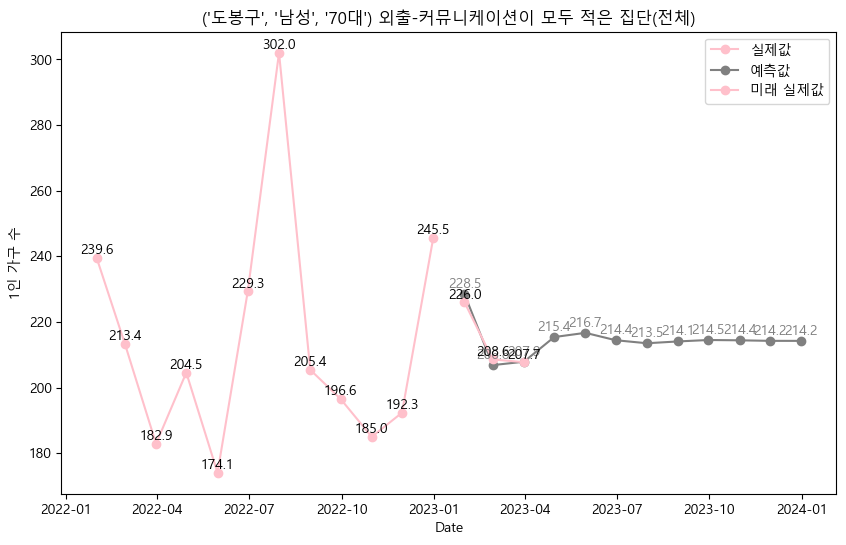

In [45]:
# 예측 결과 시각화
plt.figure(figsize=(10, 6))
plt.plot(df_col.index, df_pivot[region, gender, age], label='실제값', marker='o', color='pink')
for i in range(len(df_col.index)):
    height = df_pivot[region, gender, age][i]
    plt.text(df_col.index[i], height + 0.25, '%.1f' %height, ha='center', va='bottom', size = 10)

plt.plot(forecast.index, forecast, label='예측값', marker='o', color='gray')
for i in range(len(forecast.index)):
    height = forecast[i]
    plt.text(forecast.index[i], height + 1, '%.1f' %height, ha='center', va='bottom', size = 10, color='gray')


plt.plot(df_col2.index, df_pivot2[region, gender, age], label='미래 실제값', marker='o', color='pink')
for i in range(len(df_col2.index)):
    height = df_pivot2[region, gender, age][i]
    plt.text(df_col2.index[i], height + 0.25, '%.1f' %height, ha='center', va='bottom', size = 10)

plt.title(str(column_name) + ' ' + group)

plt.xlabel('Date')
plt.ylabel('1인 가구 수')
plt.legend()
plt.show()

- 2023.01~03에 대한 미래 예측값과 예측값의 차이가 거의 없으며, 추세가 비슷하게 예측되어 모델의 성능이 좋다고 할 수 있다.

## 8-2. 파이차트

### 현재

In [46]:
# 시계열 분석을 위한 10개 집단에 대한 피봇테이블

df_pivot3_1 = df_ts.pivot_table(index='month', columns=['자치구', '성별', '연령대'], values='커뮤니케이션이 적은 집단')
df_pivot3_2 = df_ts.pivot_table(index='month', columns=['자치구', '성별', '연령대'], values='평일 외출이 적은 집단')
df_pivot3_3 = df_ts.pivot_table(index='month', columns=['자치구', '성별', '연령대'], values='휴일 외출이 적은 집단')
df_pivot3_4 = df_ts.pivot_table(index='month', columns=['자치구', '성별', '연령대'], values='출근소요시간 및 근무시간이 많은 집단')
df_pivot3_5 = df_ts.pivot_table(index='month', columns=['자치구', '성별', '연령대'], values='외출이 매우 적은 집단(전체)')
df_pivot3_6 = df_ts.pivot_table(index='month', columns=['자치구', '성별', '연령대'], values='외출이 매우 많은 집단')
df_pivot3_7 = df_ts.pivot_table(index='month', columns=['자치구', '성별', '연령대'], values='동영상서비스 이용이 많은 집단')
df_pivot3_8 = df_ts.pivot_table(index='month', columns=['자치구', '성별', '연령대'], values='생활서비스 이용이 많은 집단')
df_pivot3_9 = df_ts.pivot_table(index='month', columns=['자치구', '성별', '연령대'], values='재정상태에 대한 관심집단')
df_pivot3_10 = df_ts.pivot_table(index='month', columns=['자치구', '성별', '연령대'], values='외출-커뮤니케이션이 모두 적은 집단(전체)')

In [47]:
# 각 피봇테이블의 2022-12 값

value1 = df_pivot3_1[region, gender, age]['2022-12']
value2 = df_pivot3_2[region, gender, age]['2022-12']
value3 = df_pivot3_3[region, gender, age]['2022-12']
value4 = df_pivot3_4[region, gender, age]['2022-12']
value5 = df_pivot3_5[region, gender, age]['2022-12']
value6 = df_pivot3_6[region, gender, age]['2022-12']
value7 = df_pivot3_7[region, gender, age]['2022-12']
value8 = df_pivot3_8[region, gender, age]['2022-12']
value9 = df_pivot3_9[region, gender, age]['2022-12']
value10 = df_pivot3_10[region, gender, age]['2022-12']

total = value1+value2+value3+value4+value5+value6+value7+value8+value9+value10

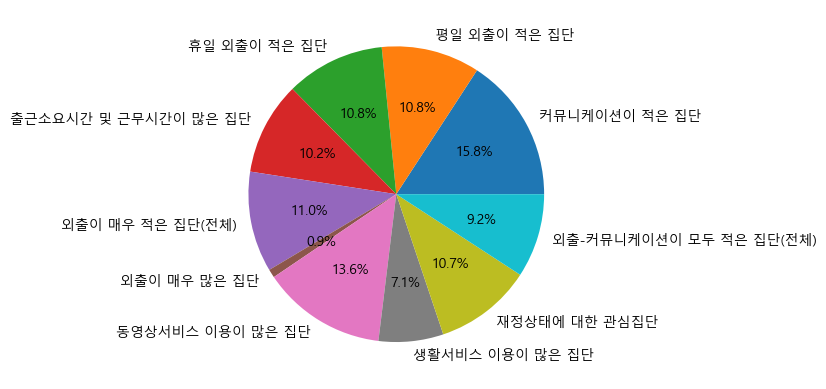

In [48]:
# 현재 1인 가구 집단들의 비중을 나타내는 파이차트

ratio = [value1/total, value2/total, value3/total, value4/total, value5/total, value6/total, value7/total, value8/total, value9/total, value10/total]
labels = ['커뮤니케이션이 적은 집단',
       '평일 외출이 적은 집단', '휴일 외출이 적은 집단', '출근소요시간 및 근무시간이 많은 집단',
       '외출이 매우 적은 집단(전체)', '외출이 매우 많은 집단', '동영상서비스 이용이 많은 집단',
       '생활서비스 이용이 많은 집단', '재정상태에 대한 관심집단', '외출-커뮤니케이션이 모두 적은 집단(전체)']

plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.show()

### 미래

In [49]:
# 집단별 피봇테이블에 대한 10개의 모델링 실시

for i in range(1, 11):
    df_col = globals()[f'df_pivot3_{i}'][region, gender, age].fillna(0)

    # PeriodIndex를 DatetimeIndex으로 바꾸기 ('M'한달 간격)
    new_index = df_col.index.to_timestamp(freq='M')

    # Datetimeindex 바꾼 데이터프레임
    df_col = pd.DataFrame(globals()[f'df_pivot3_{i}'][region, gender, age].values, index=new_index, columns=[column_name])

    # 모델 학습
    model = ARIMA(df_col, order=(2, 1, 1))  # p, d, q
    fitted_model = model.fit()

    # 2023 예측
    start_idx = len(df_col) - 1  # 지난 관측값에서 시작
    end_idx = start_idx + 12  # 12개월치 예측
    globals()[f'forecast{i}'] = fitted_model.predict(start=start_idx, end=end_idx, typ='levels')
    forecast_index = pd.date_range(start=df_col.index[-1], periods=13, freq='M')[1:]
    globals()[f'forecast{i}'] = pd.Series(globals()[f'forecast{i}'], index=forecast_index)


In [50]:
# 각 모델의 2023-12 예측값 선언

pred1 = forecast1['2023-12-31']
pred2 = forecast2['2023-12-31']
pred3 = forecast3['2023-12-31']
pred4 = forecast4['2023-12-31']
pred5 = forecast5['2023-12-31']
pred6 = forecast6['2023-12-31']
pred7 = forecast7['2023-12-31']
pred8 = forecast8['2023-12-31']
pred9 = forecast9['2023-12-31']
pred10 = forecast10['2023-12-31']

pred_total = pred1 + pred2 + pred3 + pred4 + pred5 + pred6 + pred7 + pred8 + pred9 + pred10

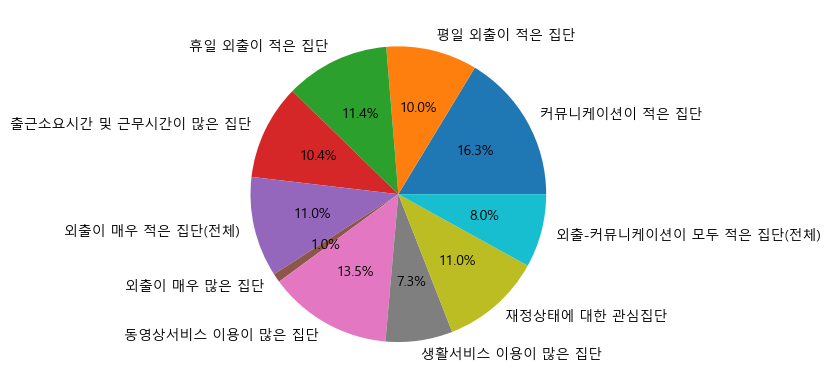

In [51]:
# 미래 1인 가구 집단들의 비중을 나타내는 파이차트

ratio = [pred1/pred_total, pred2/pred_total, pred3/pred_total, pred4/pred_total, pred5/pred_total, pred6/pred_total, pred7/pred_total, pred8/pred_total, pred9/pred_total, pred10/pred_total]
labels = ['커뮤니케이션이 적은 집단',
       '평일 외출이 적은 집단', '휴일 외출이 적은 집단', '출근소요시간 및 근무시간이 많은 집단',
       '외출이 매우 적은 집단(전체)', '외출이 매우 많은 집단', '동영상서비스 이용이 많은 집단',
       '생활서비스 이용이 많은 집단', '재정상태에 대한 관심집단', '외출-커뮤니케이션이 모두 적은 집단(전체)']

plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.show()